# **About Aerofit Case Study**

**Aerofit** is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as **treadmills**, **exercise bikes**, **gym equipment**, and **fitness accessories** to cater to the needs of all categories of people.



#**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

1.   Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.

2.   For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.










#**Column Description**

1. **Product Purchased :**	KP281, KP481, or KP781
2. **Age :**	In years
3. **Gender :**	Male/Female
4. **Education :**	In years
5. **MaritalStatus :**	Single or partnered
6. **Usage :**	The average number of times the customer plans to use the treadmill each week.
7. **Income :**	Annual income (in $)
8. **Fitness :**	Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
9. **Miles :**	The average number of miles the customer expects to walk/run each week

#**Defining Problem Statement and Analysing basic metrics**

#**Import Libraries**

In [275]:
# Importing the required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math as m


In [276]:
#Read the Dataset
df = pd.read_csv('aerofit_treadmill.csv')

In [277]:
# printing the dataset
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


#**Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary.**

In [278]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [279]:
# Shape of the dataset
df.shape

(180, 9)

*Here* we see the Overall dataset contains **180** Rows and **9** Columns

In [280]:
# Data types of all attributes
df.dtypes

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object

In [281]:
# conversion of categorical attributes to 'category'
df['Product'] = df['Product'].astype('category')
df['Gender'] = df['Gender'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

In [282]:
df.dtypes

Product          category
Age                 int64
Gender           category
Education           int64
MaritalStatus    category
Usage               int64
Fitness             int64
Income              int64
Miles               int64
dtype: object

Here, we can observe the object data type is changed as 'category'.

In [283]:
#To Get all Attributes columns
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [284]:
#Statistical Summary:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


Using describe() method we can get statistics of all numerical columns.

In [285]:
#Statistical Summary for all datatypes:
df.describe(include = 'category')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


In [286]:
# Missing Value Detection -----> Checking the Missing Values
df.isnull().sum()
#df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

Here, we can see there is no Null Values present in  any of the columns. So, there is no missing values in this dataset.



In [287]:
# Checking the duplicates
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
175    False
176    False
177    False
178    False
179    False
Length: 180, dtype: bool

In [288]:
# Checking the duplicates
df.duplicated().sum()

0

There is no duplicate values in the dataset.

#**Data Analysis**

#**Non-Graphical Analysis: Value counts and unique attributes**

In [289]:
#To Get all Attributes columns
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [290]:
df['Product'].unique()

['KP281', 'KP481', 'KP781']
Categories (3, object): ['KP281', 'KP481', 'KP781']

In [291]:
df['Product'].nunique()

3

In [292]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

In [293]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [294]:
df['Age'].nunique()

32

In [295]:
df['Age'].value_counts()

25    25
23    18
24    12
26    12
28     9
35     8
33     8
30     7
38     7
21     7
22     7
27     7
31     6
34     6
29     6
20     5
40     5
32     4
19     4
48     2
37     2
45     2
47     2
46     1
50     1
18     1
44     1
43     1
41     1
39     1
36     1
42     1
Name: Age, dtype: int64

In [296]:
df['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [297]:
df['Gender'].nunique()

2

In [298]:
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [299]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [300]:
df['Education'].nunique()

8

In [301]:
df['Education'].value_counts()

16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: Education, dtype: int64

In [302]:
df['MaritalStatus'].unique()

['Single', 'Partnered']
Categories (2, object): ['Partnered', 'Single']

In [303]:
df['MaritalStatus'].nunique()

2

In [304]:
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [305]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [306]:
df['Usage'].nunique()

6

In [307]:
df['Usage'].value_counts()

3    69
4    52
2    33
5    17
6     7
7     2
Name: Usage, dtype: int64

In [308]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [309]:
df['Fitness'].nunique()

5

In [310]:
df['Fitness'].value_counts()

3    97
5    31
2    26
4    24
1     2
Name: Fitness, dtype: int64

In [311]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [312]:
df['Income'].nunique()

62

In [313]:
df['Income'].value_counts()

45480    14
52302     9
46617     8
54576     8
53439     8
         ..
65220     1
55713     1
68220     1
30699     1
95508     1
Name: Income, Length: 62, dtype: int64

In [314]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

In [315]:
df['Miles'].nunique()

37

In [316]:
df['Miles'].value_counts()

85     27
95     12
66     10
75     10
47      9
106     9
94      8
113     8
53      7
100     7
180     6
200     6
56      6
64      6
127     5
160     5
42      4
150     4
38      3
74      3
170     3
120     3
103     3
132     2
141     2
280     1
260     1
300     1
240     1
112     1
212     1
80      1
140     1
21      1
169     1
188     1
360     1
Name: Miles, dtype: int64

**Summary**

*   **KP281, KP481, KP781** are the **3** different products.
*   Most commonly purchased treadmill product type is **KP281** count of **80**.
*   There are **32** unique ages.
*   **104 Males** and **76 Females** are in the customers list.
*   **8** unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21).
*   Highest rated Fitness rating is **3** which means many of the customer provide average rating.
*   Most customers **usage** treadmill atleast **3** days per week.
*   Majority of the customers who have purchased are **Married/Partnered**.
















#**Vizual Analysis**

**Univariate Analysis For continuous variables**

In [317]:
# Define variables to plot for numberical analysis
variables = ['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']

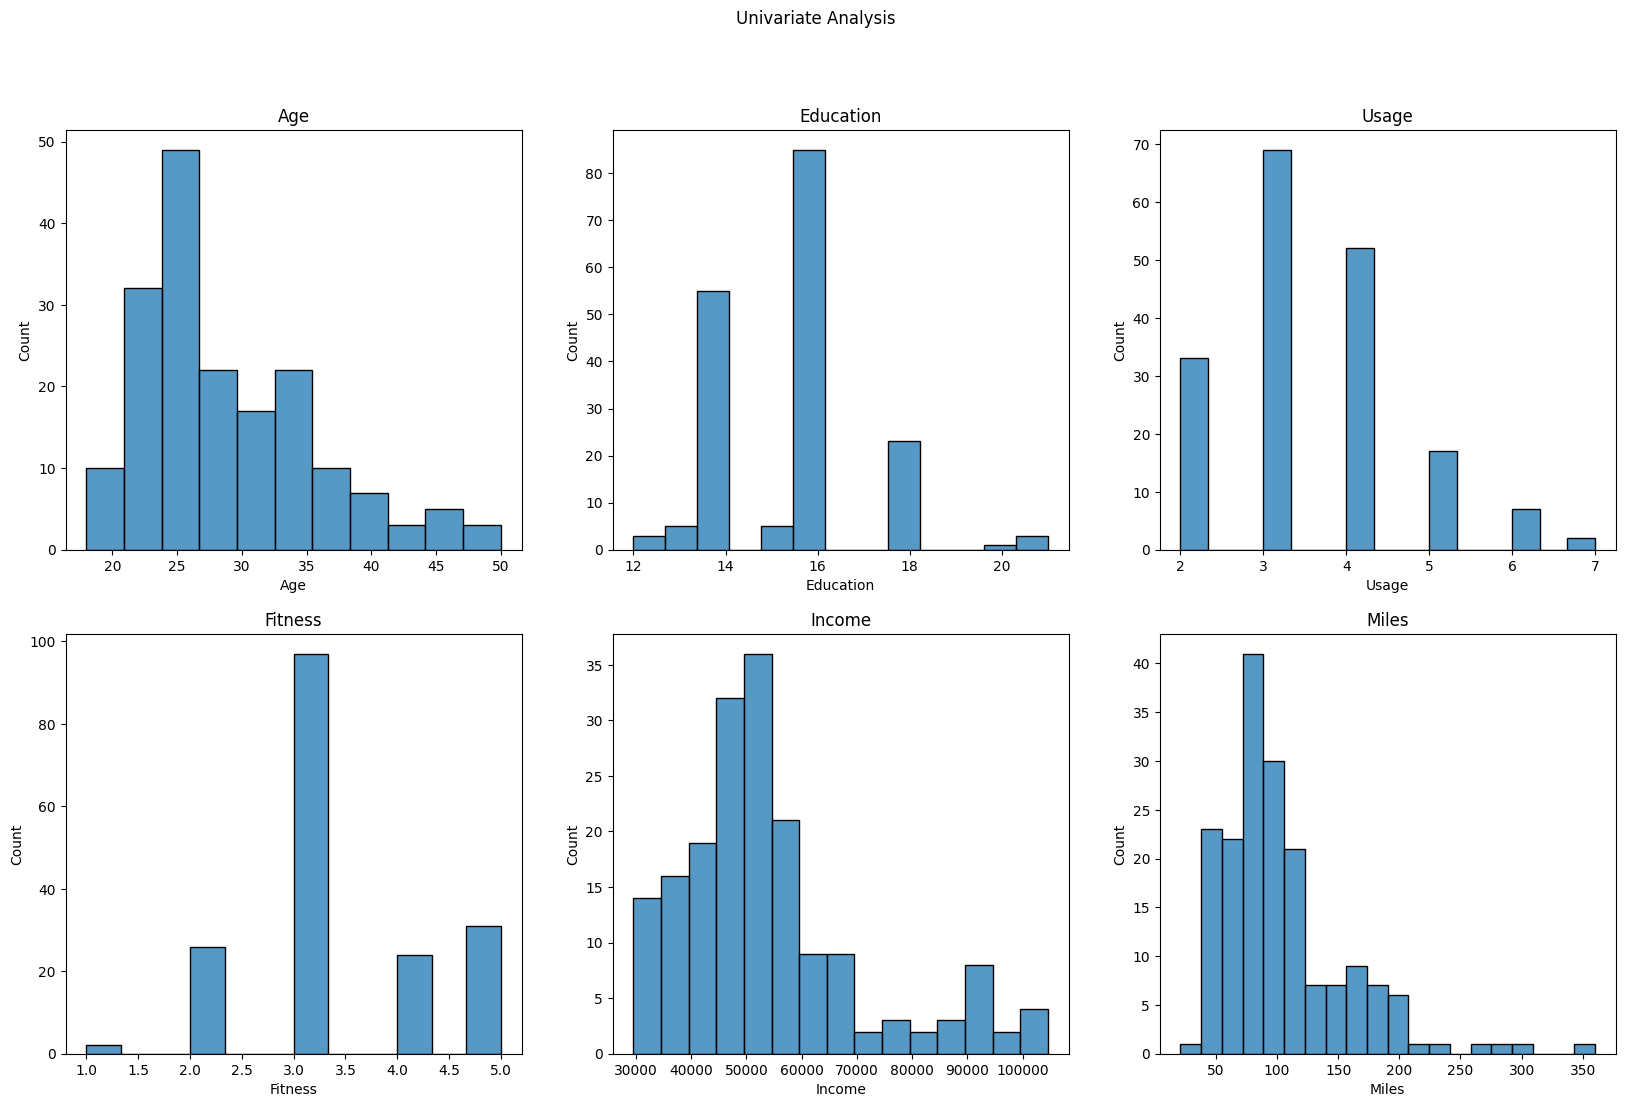

In [318]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
for i in range(2):
    for j in range(3):
        index = i * 3 + j
        if index < len(variables):
            variable = variables[index]
            sns.histplot(ax=axes[i, j], data=df, x=variable)
            axes[i, j].set_title(variable)
        else:
            axes[i, j].axis('off')
plt.suptitle("Univariate Analysis")
plt.show()


**Insights:**

*    The Majority of users are approximately **25 years old**, indicating a younger demographic.

*   The Majority of users have completed **16 years** of education, which typically corresponds to a bachelor's degree.

*   The Majority of users use the treadmill **three times** a week, indicating a regular exercise routine.

*   The Majority of users have a **fitness level of 3,** which could represent a moderate level of physical fitness.

*   The Majority of users having the annual income in the range of  **50,000 - 55,000**.

*   The Majority of users walk or run an average of **90 miles** each week, suggesting a significant level of physical activity.







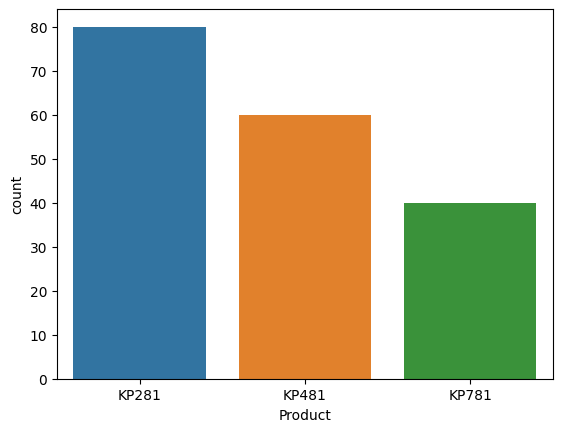

In [319]:
# Product Analysis - count plot
sns.countplot(data=df, x='Product', hue = 'Product')
plt.show()


*   **KP281** is the most commonly purchase product type.
*   **KP481** is the second most top product type purchased.
*   **KP781** is the least purchased product typeList item.

<ipython-input-320-92ad5e938719>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Income'], rug=True)


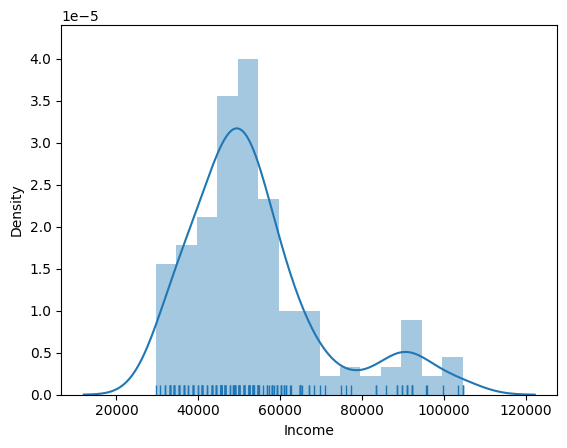

In [320]:
# Income Analysis - Distplot
sns.distplot(df['Income'], rug=True)
plt.show()



> **Insights:**


*   The majority of product purchasers fall within the income range of **45K to 60K**, with an average income **density** exceeding **3.0**.

#**Outlier Detection**

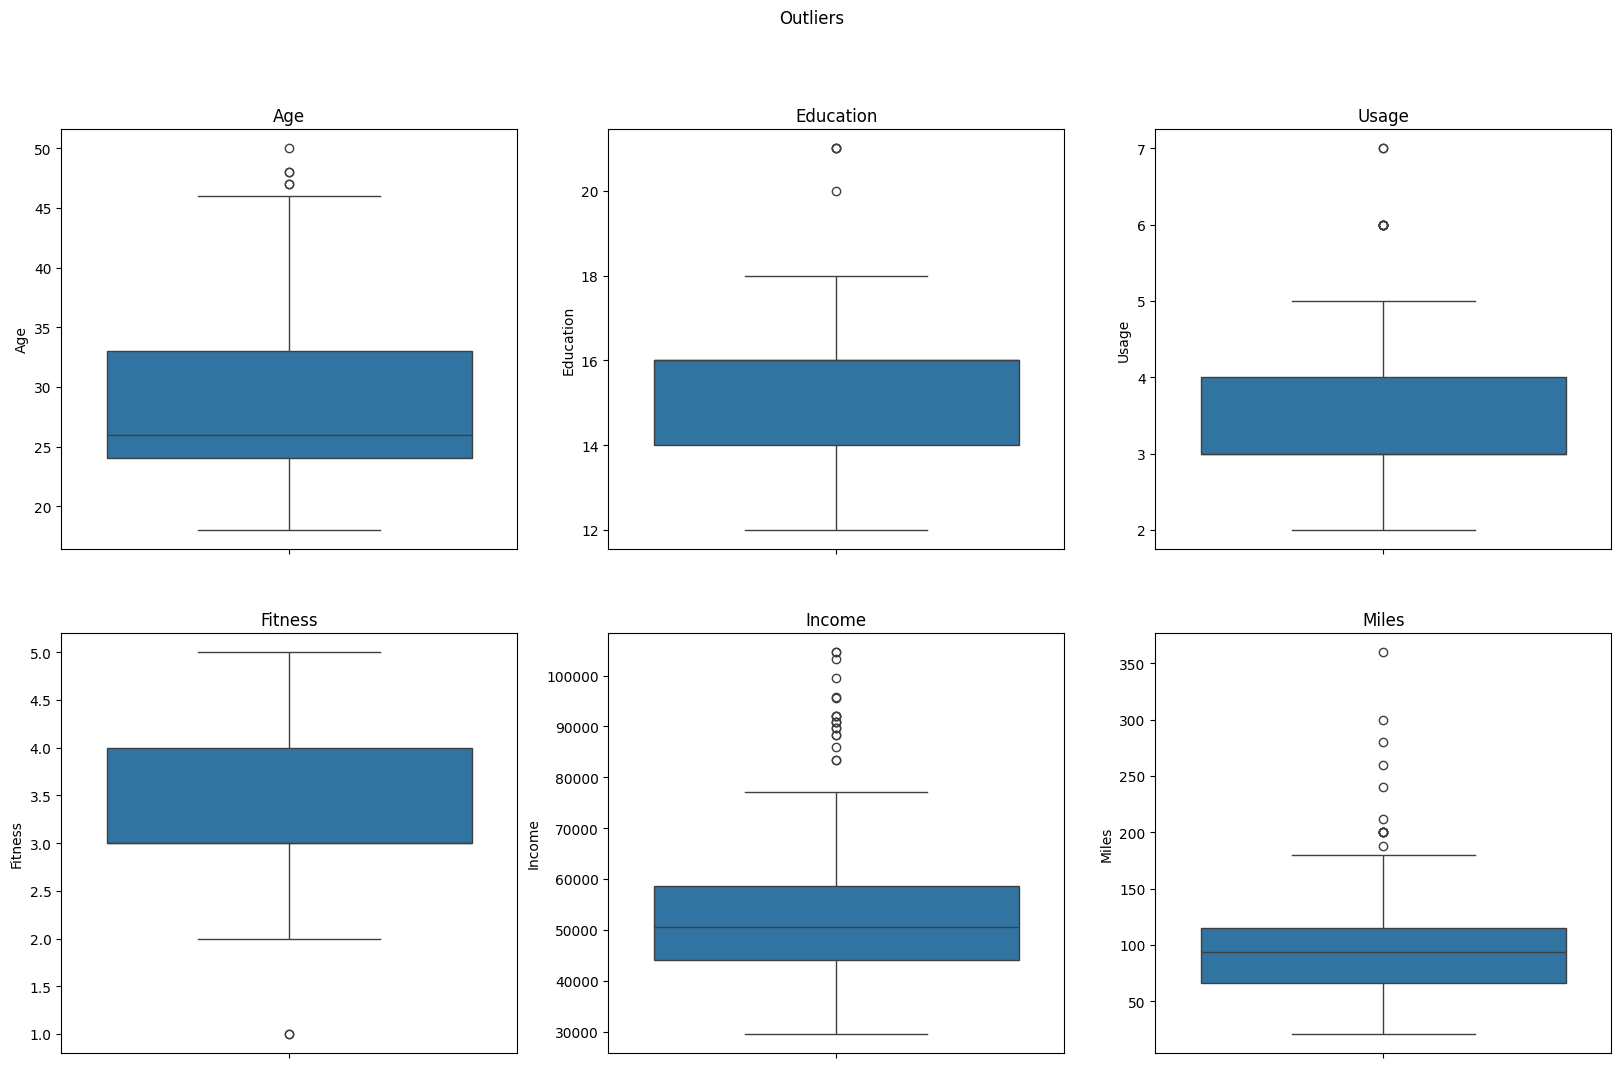

In [321]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        variable = variables[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data = df, y = variable)
        axes[i, j].set_title(variable)

plt.suptitle("Outliers")
plt.show();



> **Insights:**
*   There seams to be more Outliers on **Income** and **Miles** column.
*   
The product is predominantly purchased by customers aged 23 to 34, while there are relatively few customers above 45 years old.
*   
Most customers prefer using the product **3 to 4** days per week, while a **few outliers** use **it 6 to 7** days per week.
*   The majority of customers earn between 45K to around 60K per annum, with a few outliers having an income above **80K** per annum.
*   
A few customers have rated their fitness as **1**, which are considered outliers, while most customers have rated their fitness between **3.0 to 4.0.**


**For correlation: Heatmaps, Pairplots**

<ipython-input-322-fcdd4d044372>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.4f', linewidths=0.5, cmap='coolwarm')


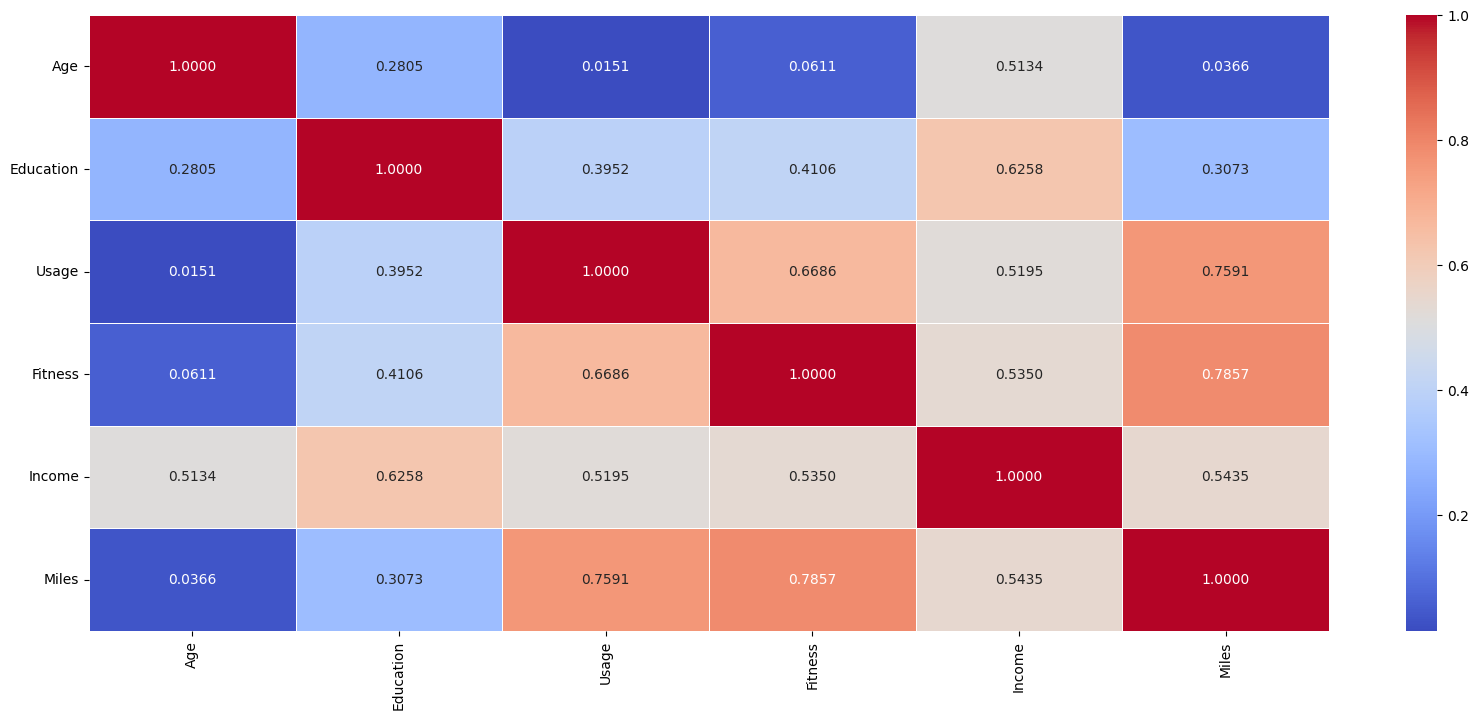

In [322]:
#Correlation HeatMap
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, fmt='.4f', linewidths=0.5, cmap='coolwarm')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()



> **Insights:**
*   Here we can observe the above Heatmap, the **Highest** Correlation between **Fitness** and **Miles** having **0.7857**
*   And futher  second Correlation followed between **Usage** and **Miles** having **0.7591**
*   The **Lowest** Correlation is between **Age** and **Usage** having **0.0151**

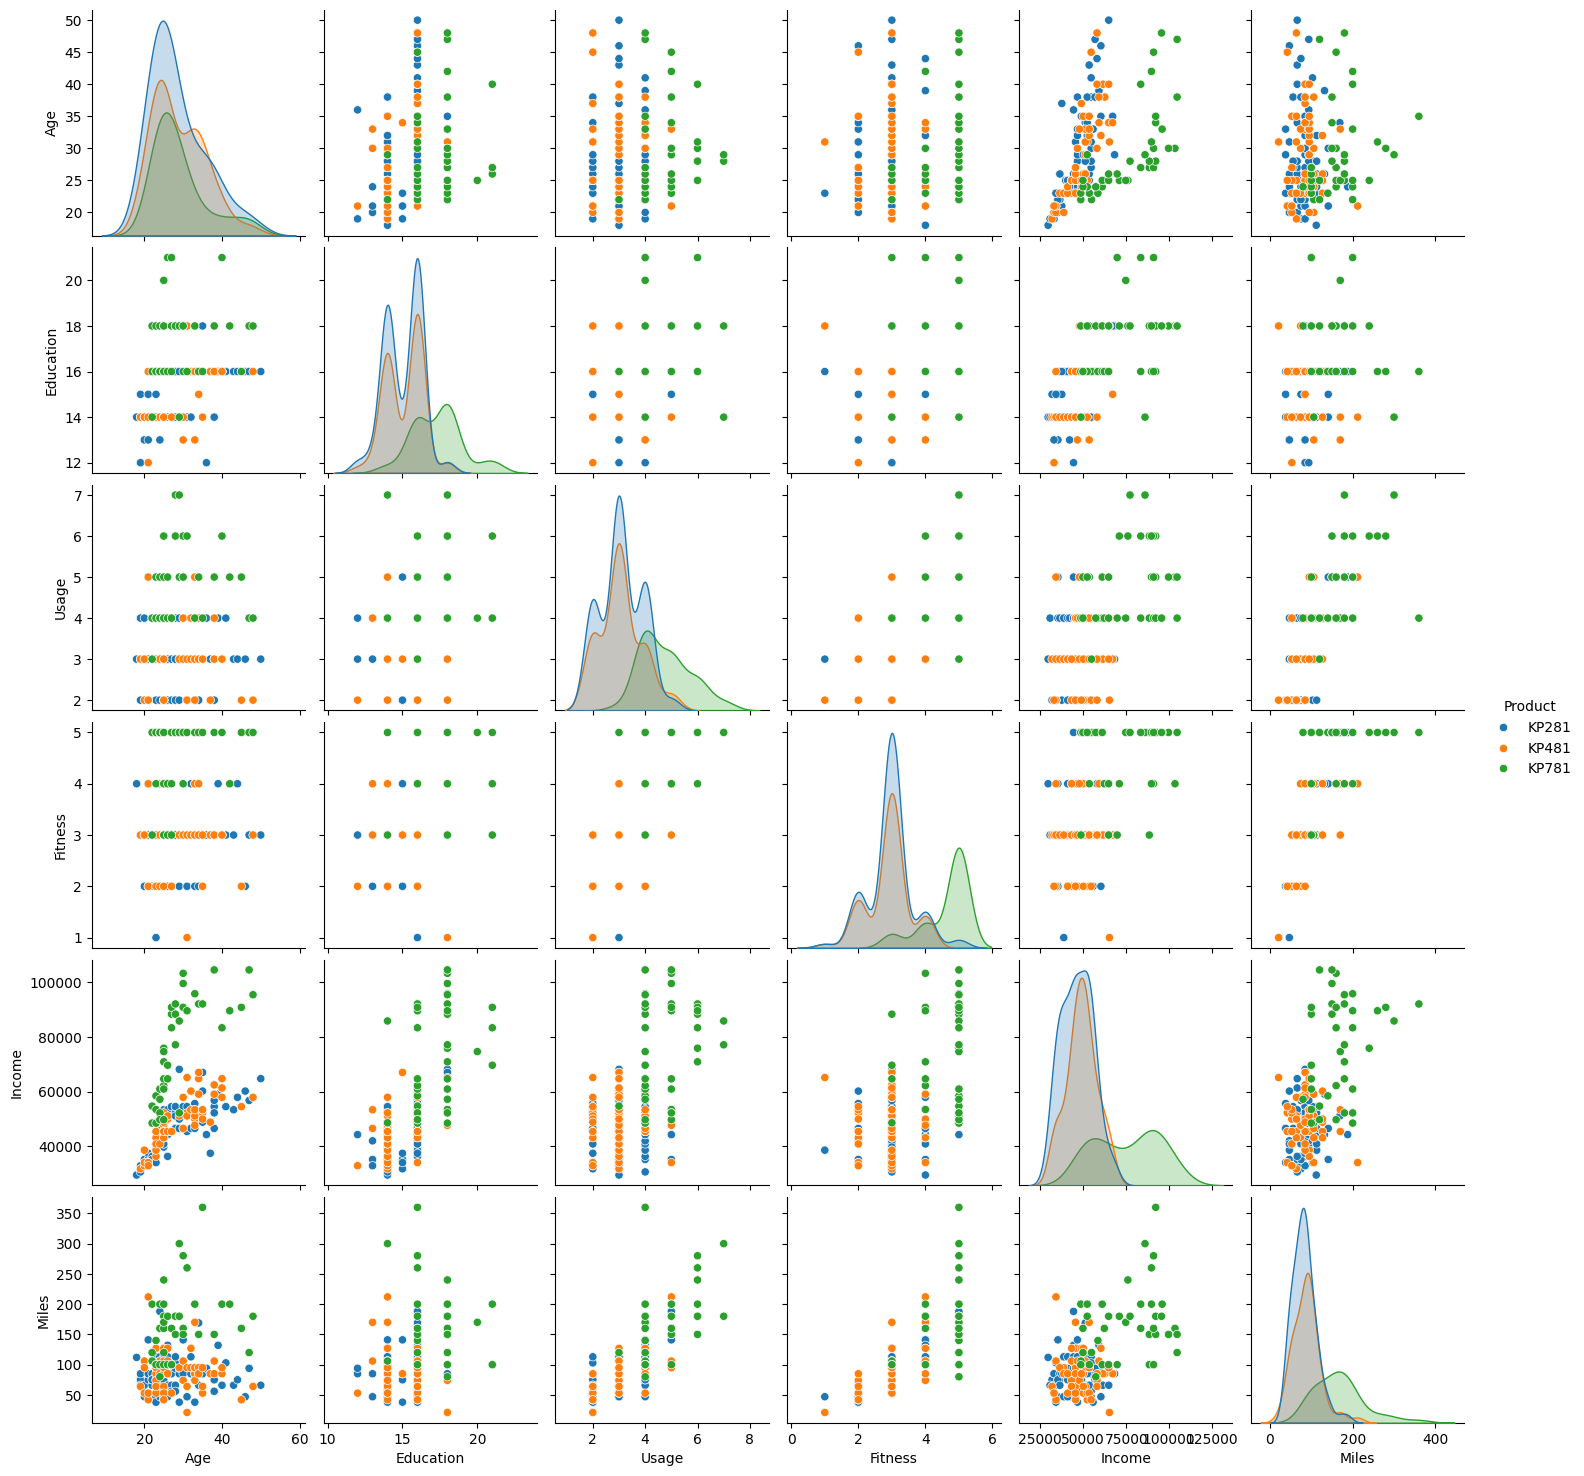

In [323]:
# Product Analysis - Pair Plot
sns.pairplot(df, hue="Product")

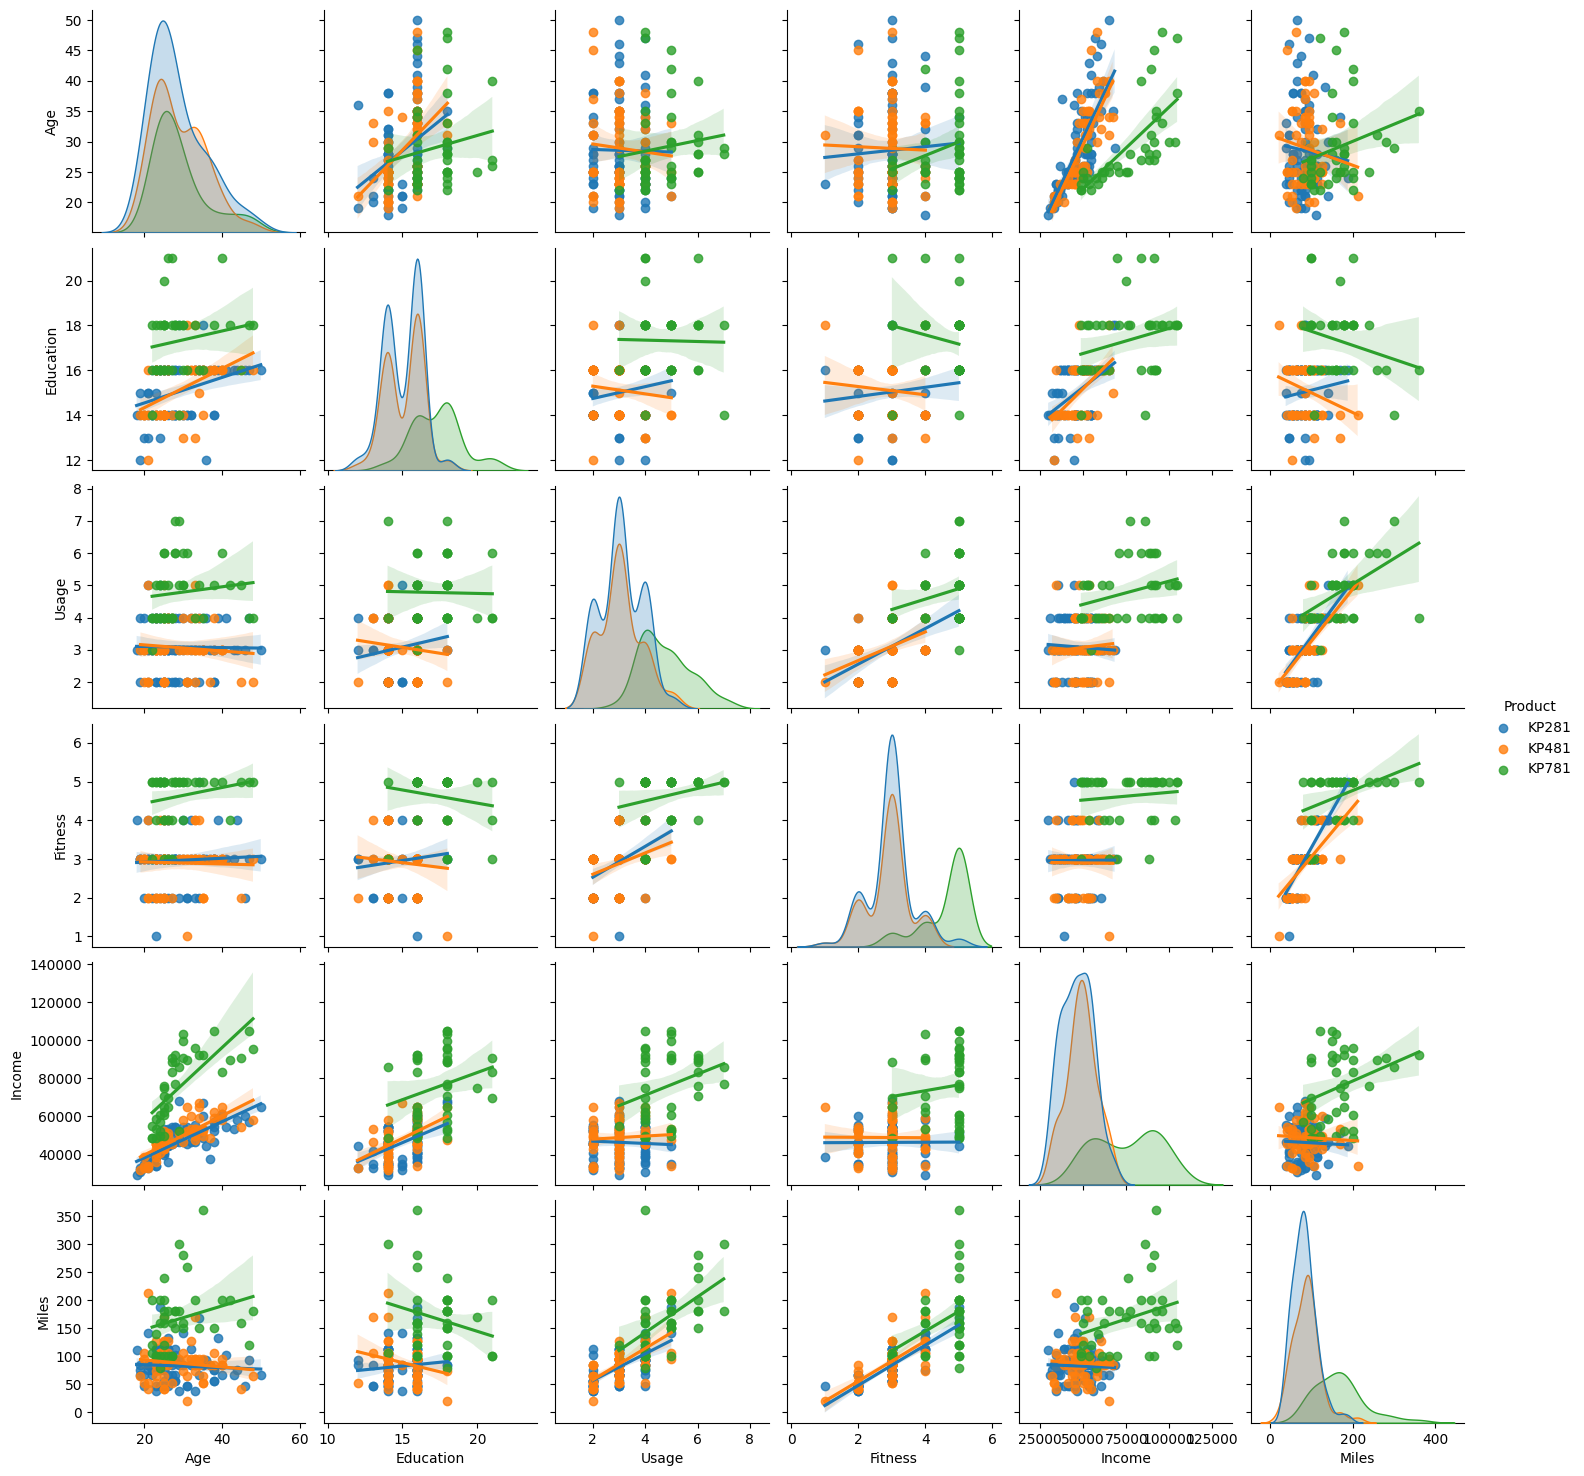

In [324]:
sns.pairplot(df,hue='Product',kind='reg')
plt.show()

**Bivariate Analysis**

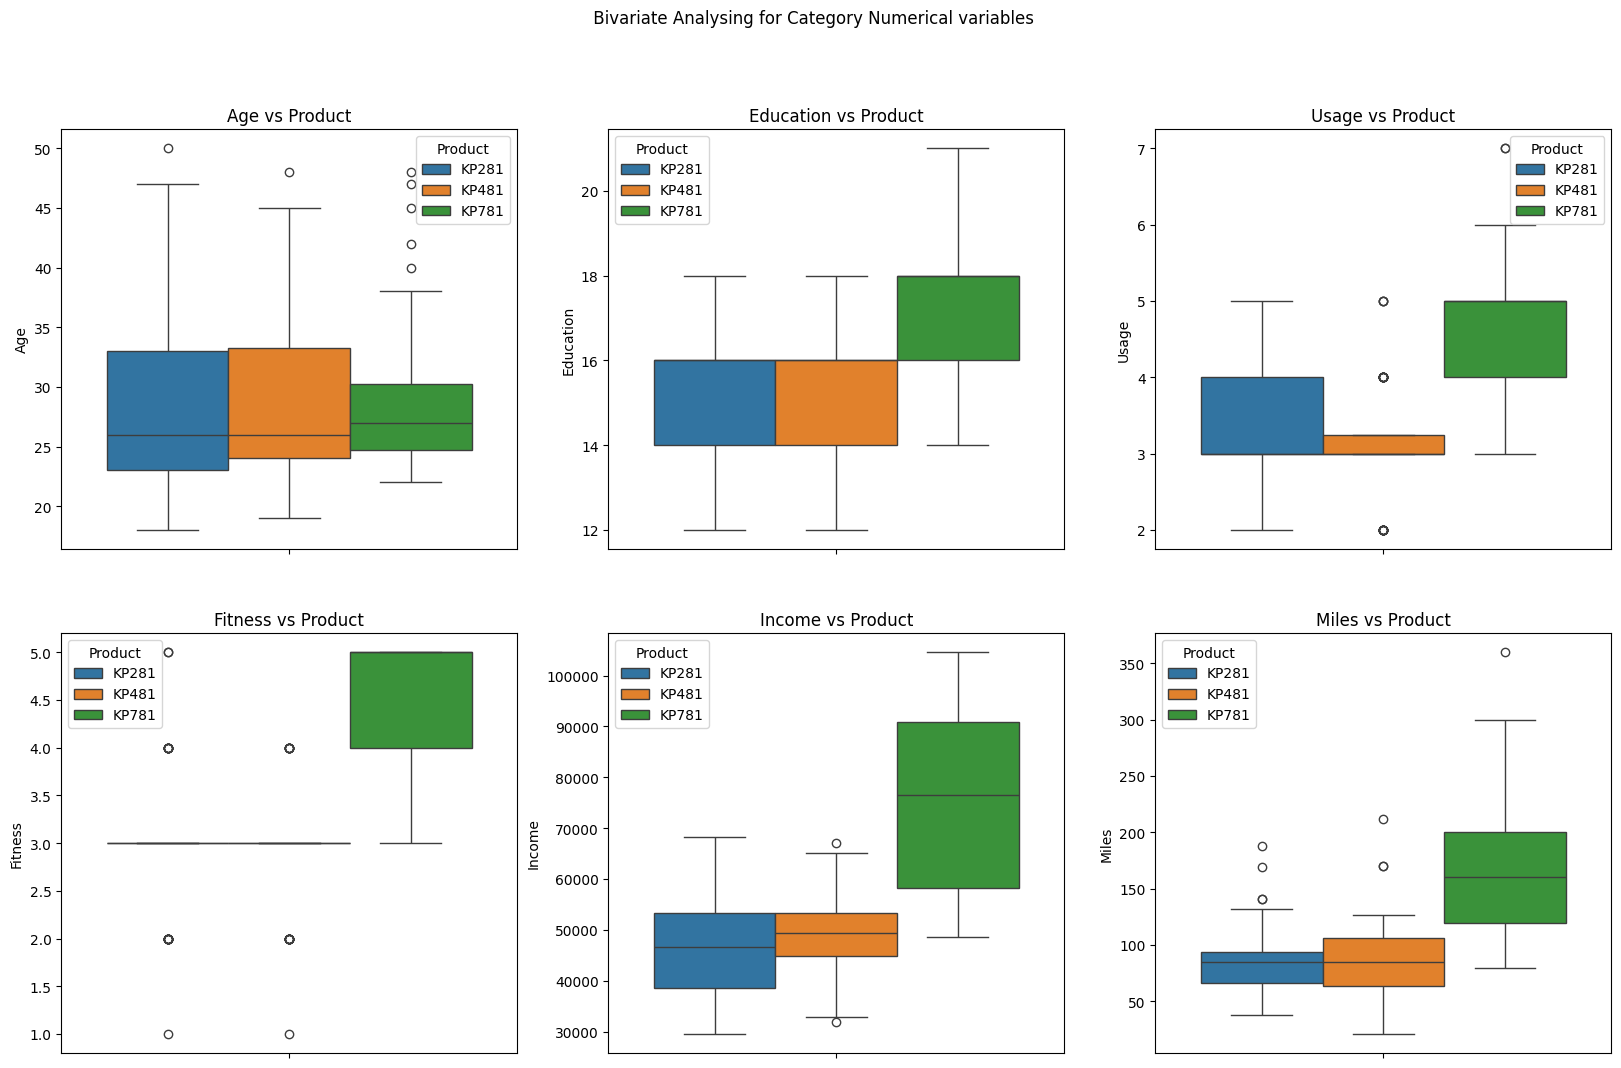

In [325]:
# Bivariate Analysing for Category Numerical (CN) variables
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for variable, ax in zip(variables, axes):
    sns.boxplot(ax=ax, data=df, y=variable, hue="Product")
    ax.set_title(f"{variable} vs Product")

plt.suptitle(" Bivariate Analysing for Category Numerical variables")
plt.show()



> **Insight:**
*   Above plot shows that **Education**, **Fitness**, **Income**, **Usage**, and **Miles** have big impact on Sales of **KP781** Product.







**Multi-Variate Analysis**

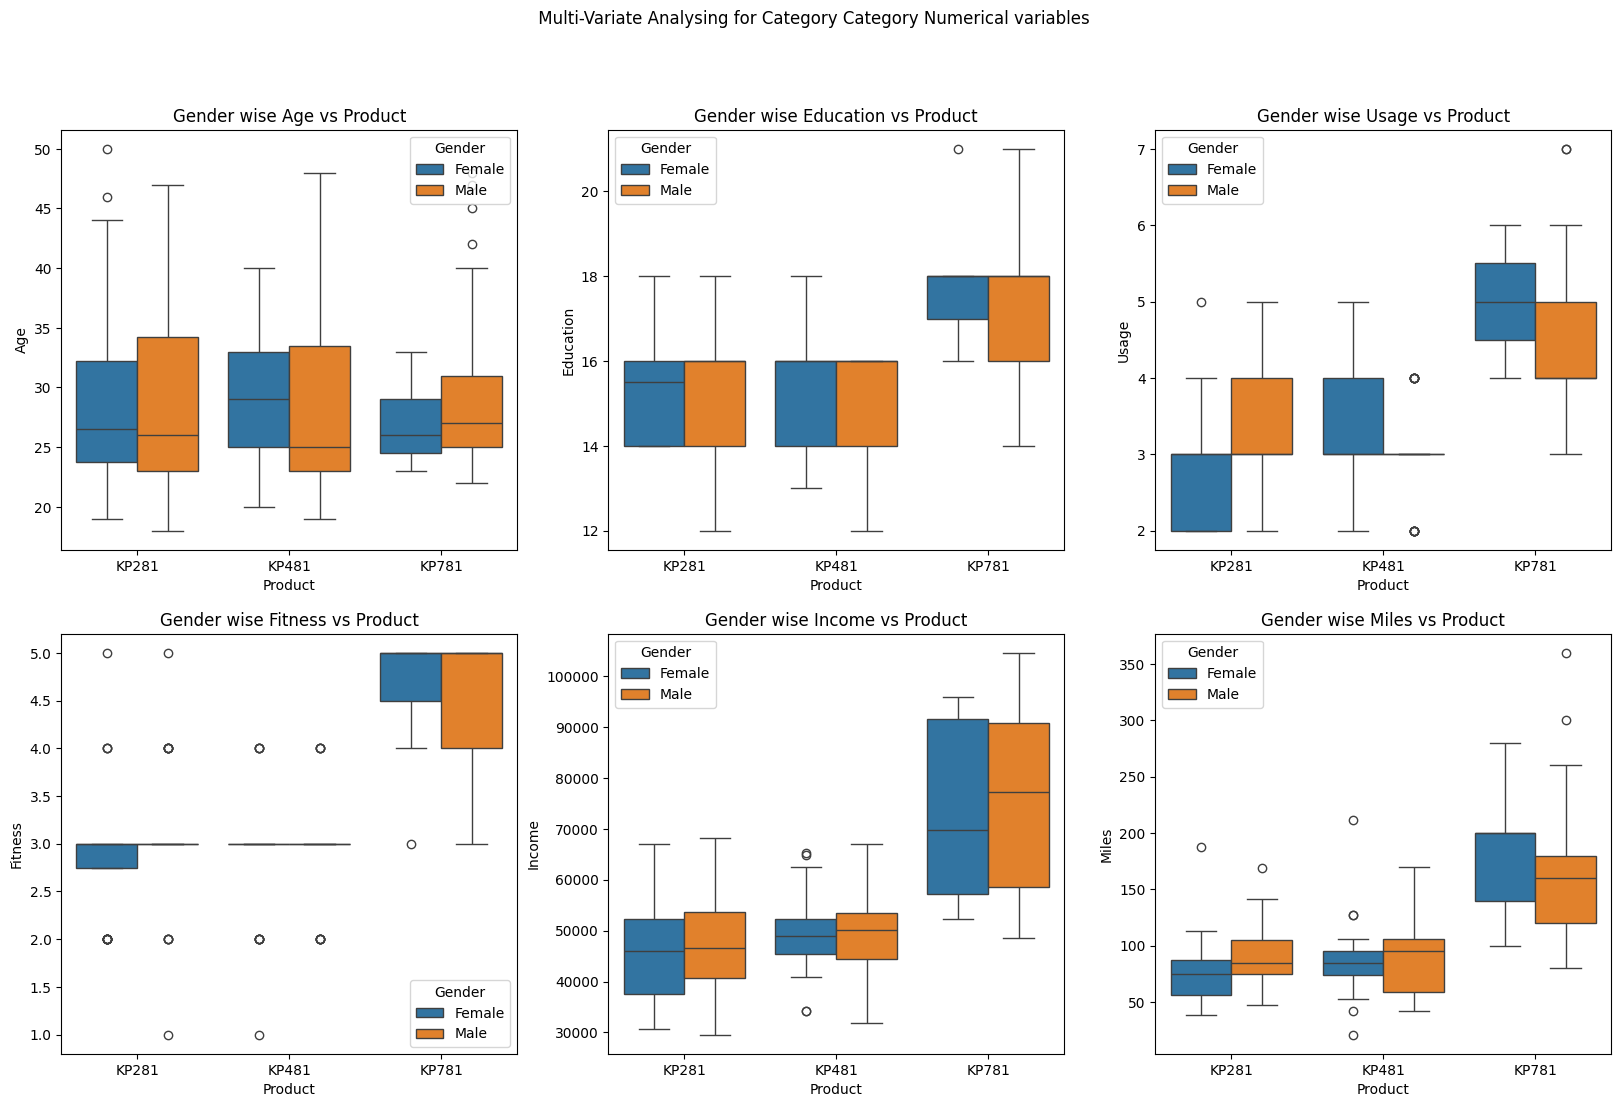

In [326]:
# Multi-Variate Analysis for Category Category Numerical (CCN) variables

fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for variable, ax in zip(variables, axes):
    sns.boxplot(data=df, x="Product", y=variable, hue="Gender", ax=ax)
    ax.set_title(f"Gender wise {variable} vs Product")

plt.suptitle(" Multi-Variate Analysing for Category Category Numerical variables")
plt.show()



> **Insight:**


*   Here we can observe the above plot, the Female users of **KP281** exhibit lower usage compared to female users of **KP781**.


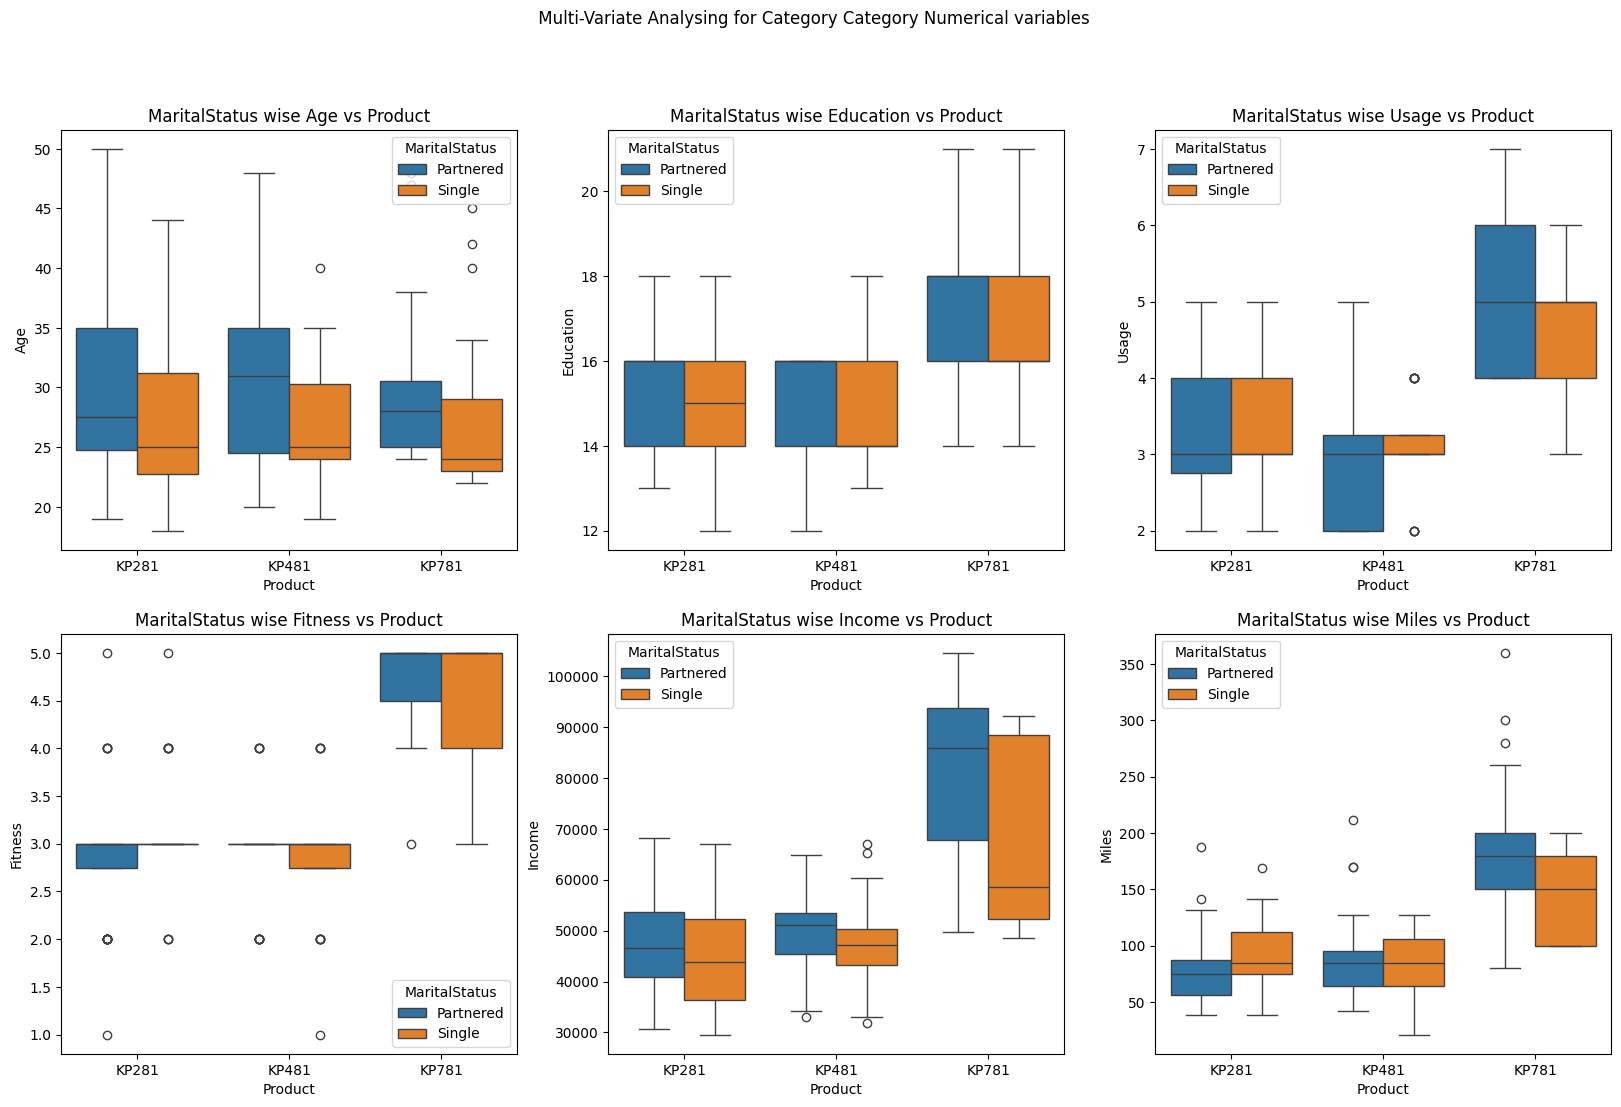

In [327]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for variable, ax in zip(variables, axes):
    sns.boxplot(data=df, x="Product", y=variable, hue="MaritalStatus", ax=ax)
    ax.set_title(f"MaritalStatus wise {variable} vs Product")

plt.suptitle(" Multi-Variate Analysing for Category Category Numerical variables")
plt.show()


> **Insight:**
*   **Partnered** users has higher usage of **KP781** product as compared to **Single** users.













<Axes: xlabel='Miles', ylabel='Income'>

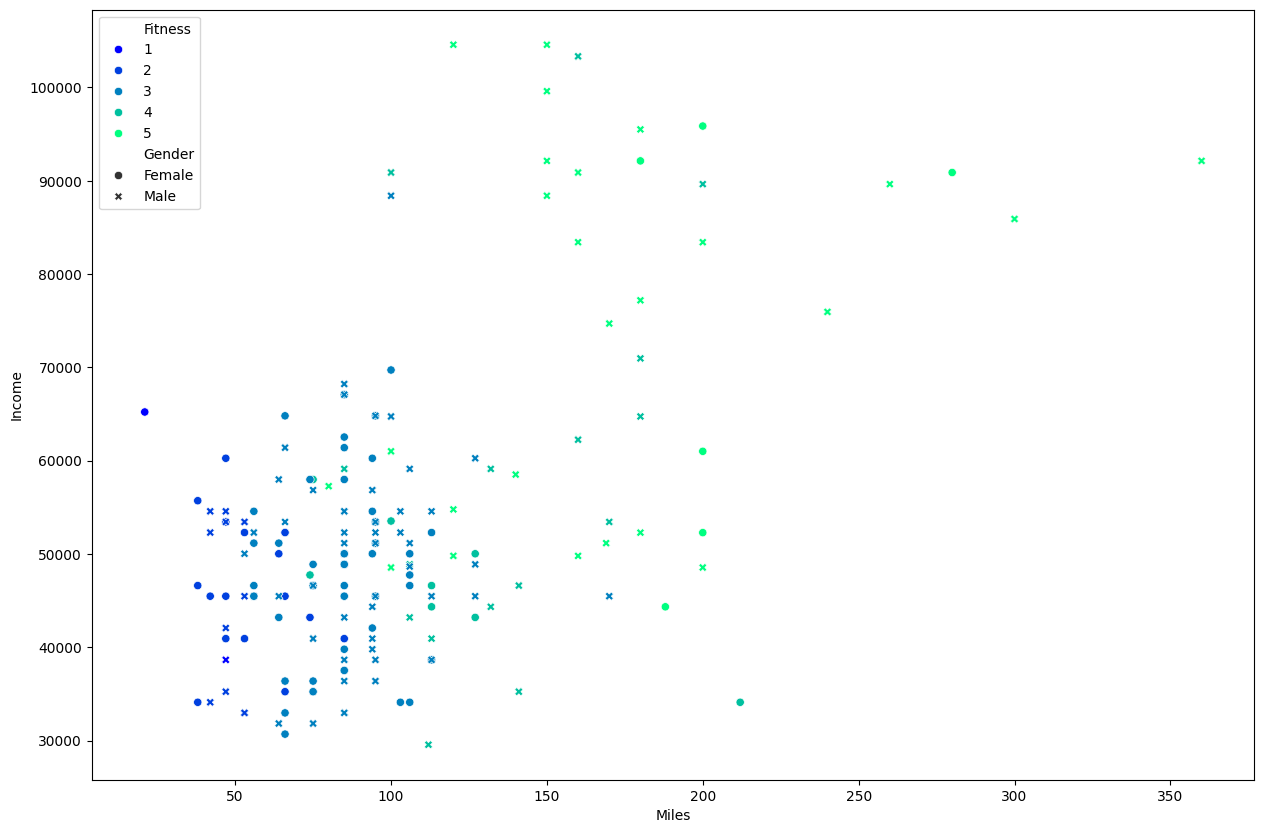

In [328]:
# Scatter Plot
plt.figure(figsize=(15,10))
sns.scatterplot(x='Miles',y='Income',data=df,hue='Fitness',style='Gender',palette='winter')



> **Insights:**
*   
Most customers have a fitness level between **3** and **4**, indicating **moderate to good fitness**.
*   There's a positive correlation between the number of miles run and fitness level, suggesting that those who run more tend to have better fitness levels.
*  Although there's a trend of higher income being associated with running more miles, only a few customers with high incomes also run considerable distances.

#**Probabilities**

In [329]:
df["Product"].value_counts(normalize=True)

KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: Product, dtype: float64



> **Insights**:

*   On a larger scale we can say that:
     *   Probability that an user would bought **KP281** is **44.44%**
     *   Probability that an user would bought **KP481** is **33.33%**
     *   Probability that an user would bought **KP781** is **22.22%**

*   As the result, **KP281** is the most popular product.


In [330]:
df['Gender'].value_counts(normalize=True)

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

Here we can see **57.78%** of customers are **Male** and **42.22%** customers are **Female**.


In [331]:
df['MaritalStatus'].value_counts(normalize=True)

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64


> **Insights:**
*   **59.44%** of customers are **Married/Partnered**.
*   **40.56%** of customers are **Single**.

In [332]:
df['Fitness'].value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64



> **Insights:**
*   **More than 53%** of customers have rated themselves as average in fitness (**rated 3**).
*   **14%** of customers have rated their fitness **less** than average.
*   **Over 17%** of customers have peak fitness ratings.








In [333]:
# Average usage of each product type by the customer
df.groupby('Product')['Usage'].mean()

Product
KP281    3.087500
KP481    3.066667
KP781    4.775000
Name: Usage, dtype: float64


> **Insights:**
*   **Mean usage** for product **KP281** is **3.08**
*   **Mean usage** for product **KP481** is **3.06**
*   **Mean usage** for product **KP781** is **4.77**

In [334]:
# Average Age of customer using each product
df.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64


> **Insights:**
*   **Mean Age** of the customer who purchased product **KP281** is **28.55**
*   **Mean Age** of the customer who purchased product **KP481** is **28.90**
*   **Mean Age** of the customer who purchased product **KP781** is **29.10**


In [335]:
# Average Education of customer using each product
df.groupby('Product')['Education'].mean()

Product
KP281    15.037500
KP481    15.116667
KP781    17.325000
Name: Education, dtype: float64


> **Insights:**
*   **Mean Education** qualification of the customer who purchased product **KP281** is **15.03**
*   **Mean Education** qualification of the customer who purchased product **KP481** is **15.11**
*   **Mean Education** qualification of the customer who purchased product **KP781** is **17.32**

In [336]:
# Average customer fitness rating for each product type purchased
df.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64


> **Insights:**
*   Customer **fitness mean** for product **KP281** is **2.96**
*   Customer **fitness mean** for product **KP481** is **2.90**
*   Customer **fitness mean** for product **KP781** is **4.62**

**Marginal Probability**

In [337]:
# Using pandas.crosstab() function we can find probabilities of each Category with respect to the each Product item
print("Maritial Status vs Products")

pd.crosstab(index=df["MaritalStatus"], columns=df['Product'] , margins=True,  normalize=True)

Maritial Status vs Products


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.266667,0.200000,0.127778,0.594444
Single,0.177778,0.133333,0.094444,0.405556
All,0.444444,0.333333,0.222222,1.000000



> **Insights:**
*   **59.44%** of total users are **Partnered** users.
*   **26.67%** of Partnered users are using **KP281** product.





In [338]:
print("Gender vs Products")

pd.crosstab(index = df['Gender'], columns = df['Product'], margins = True, normalize = True)

Gender vs Products


Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222222,0.161111,0.038889,0.422222
Male,0.222222,0.172222,0.183333,0.577778
All,0.444444,0.333333,0.222222,1.000000



> **Insights:**
*   **57.78%** of customers are **Male** and **42.22%** customers are **Female**.
*   Both **Male and Female** customers are approximately equally purchased the **KP281** and **KP481** products.
*   **Male** customers are **almost 6 times** dominating the purchase of **KP781** product compared to **Female** customers.

**Conditional Probability**

In [339]:
# Using conditions inside a dataframe and value_counts() function, we can find conditional probabilities
# Probability of Product vs Gender

print("Probability (Product | Male)")
print(df[df["Gender"] == "Male"]["Product"].value_counts(normalize=True))

print("\nProbability (Product | Female)")
print(df[df["Gender"] == "Female"]["Product"].value_counts(normalize=True))

Probability (Product | Male)
KP281    0.384615
KP781    0.317308
KP481    0.298077
Name: Product, dtype: float64

Probability (Product | Female)
KP281    0.526316
KP481    0.381579
KP781    0.092105
Name: Product, dtype: float64



> **Insights:**
*   **Female** users are more likely to buy **KP281** and highly unlikely to buy **KP781**.
*   There is **almost equal** distribution of Products through the **Male** users.





In [340]:
# Probability of Product vs MaritalStatus

print("Probability (Product | Partnered)")
print(df[df["MaritalStatus"] == "Partnered"]["Product"].value_counts(normalize=True))

print("\nProbability (Product | Single)")
print(df[df["MaritalStatus"] == "Single"]["Product"].value_counts(normalize=True))

Probability (Product | Partnered)
KP281    0.448598
KP481    0.336449
KP781    0.214953
Name: Product, dtype: float64

Probability (Product | Single)
KP281    0.438356
KP481    0.328767
KP781    0.232877
Name: Product, dtype: float64



> **Insights:**
*   **Probability** of purchasing **KP781 Single** users is **Slightly higher** then **Partnered** Users.
*   **Probability** of purchasing the Products **KP281** and **KP481** are **almost similar** between **Single** and **Partnered** Users.





In [341]:
# Probability of MaritalStatus Vs Each Product

print("Probability (MaritalStatus | KP281)")
print(df[df["Product"] == "KP281"]["MaritalStatus"].value_counts(normalize=True))

print("\nProbability (MaritalStatus | KP481)")
print(df[df["Product"] == "KP481"]["MaritalStatus"].value_counts(normalize=True))

print("\nProbability (MaritalStatus | KP781)")
print(df[df["Product"] == "KP781"]["MaritalStatus"].value_counts(normalize=True))

Probability (MaritalStatus | KP281)
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

Probability (MaritalStatus | KP481)
Partnered    0.6
Single       0.4
Name: MaritalStatus, dtype: float64

Probability (MaritalStatus | KP781)
Partnered    0.575
Single       0.425
Name: MaritalStatus, dtype: float64



> **Insights:**
*   **Probability** of purchasing the Products **KP281** and **KP481** are **almost Equal** between **Single** and **Partnered** Users.
*   **Probability** of purchasing **KP781** product **Partnered Users are high** compared to Single Users.





In [342]:
# Probability of Product vs ( MaritalStatus & Gender )

print("\nProbability (Product | Single & Male)")
print(df[(df["MaritalStatus"] == "Single") & (df["Gender"]=="Male")]["Product"].value_counts(normalize=True))

print(" \nProbability (Product | Single & Female)")
print(df[(df["MaritalStatus"] == "Single") & (df["Gender"]=="Female")]["Product"].value_counts(normalize=True))

print("\nProbability (Product | Partnered & Male)")
print(df[(df["MaritalStatus"] == "Partnered") & (df["Gender"]=="Male")]["Product"].value_counts(normalize=True))

print("\nProbability (Product | Partnered & Female)")
print(df[(df["MaritalStatus"] == "Partnered") & (df["Gender"]=="Female")]["Product"].value_counts(normalize=True))


Probability (Product | Single & Male)
KP281    0.441860
KP781    0.325581
KP481    0.232558
Name: Product, dtype: float64
 
Probability (Product | Single & Female)
KP481    0.466667
KP281    0.433333
KP781    0.100000
Name: Product, dtype: float64

Probability (Product | Partnered & Male)
KP281    0.344262
KP481    0.344262
KP781    0.311475
Name: Product, dtype: float64

Probability (Product | Partnered & Female)
KP281    0.586957
KP481    0.326087
KP781    0.086957
Name: Product, dtype: float64



> **Insights:**
*   Probability of purchasing all the **3 Products** in Partnered Male customers are **almost equally** contributed.
*   Probability of purchasing **KP281** product are highly contributed by Partnered Female Customers with **58.7%**.





# **Business Insights**

**Business Insights for Non-Graphical Analysis**


*   **KP281, KP481, KP781** are the **3** different products.
*   Most commonly purchased treadmill product type is **KP281** count of **80**.
*   There are **32** unique ages.
*   **104 Males** and **76 Females** are in the customers list.
*   **8** unique set of Educations (14, 15, 12, 13, 16, 18, 20, 21).
*   Highest rated Fitness rating is **3** which means many of the customer provide average rating.
*   Most customers **usage** treadmill atleast **3** days per week.
*   Majority of the customers who have purchased are **Married/Partnered**.

**Business Insights for Vizual Analysis**
* The Majority of users are approximately **25 years old**, indicating a younger demographic.

*   The Majority of users have completed **16 years** of education, which typically corresponds to a bachelor's degree.

*   The Majority of users use the treadmill **three times** a week, indicating a regular exercise routine.

*   The Majority of users have a **fitness level of 3,** which could represent a moderate level of physical fitness.

*   The Majority of users having the annual income in the range of  **50,000 - 55,000**.

*   The Majority of users walk or run an average of **90 miles** each week, suggesting a significant level of physical activity.

# **Customer Profiling**

Customer profiling based on the 3 product categories provided

**KP281**
*   Easily affordable entry level product, which is also the maximum selling product.
*   KP281 is the most popular product among the entry level customers.
*   This product is easily afforded by both Male and Female customers.
*   Average distance covered in this model is around 70 to 90 miles.
*   Product is used 3 to 4 times a week.
*   Most of the customer who have purchased the product have rated Average shape as the fitness rating.
*   Younger to Elder beginner level customers prefer this product.
*   Income range between 39K to 53K have preferred this product
*   Single female & Partnered male customers bought this product more than single male customers.

**KP481**
*   This is an Intermediate level Product.
*   KP481 is the second most popular product among the customers.
*   Customers Prefer this product mostly to cover more miles than fitness.
*   Average distance covered in this product is from 70 to 130 miles per week.
*   Probability of Female customer buying KP481 is significantly higher than male.
*   More Female customers prefer this product than males.
*   KP481 product is specifically recommended for Female customers who are intermediate user.
*   Average Income of the customer who buys KP481 is 49K.
*   Average Usage of this product is 3 days per week.
*   More Partnered customers prefer this product.
*   There are slightly more male buyers of the KP481.
*   The distance travelled on the KP481 treadmill is roughly between 75 - 100 Miles. It is also the 2nd most distance travelled model.
*   The buyers of KP481 in Single & Partnered, Male & Female are same.
*   The age range of KP481 treadmill customers is roughly between 24-34 years.

**KP781**

*   Due to the High Price & being the advanced type, customer prefers less of this product.
*   Customers use this product mainly to cover more distance.
*   Customers who use this product have rated excelled shape as fitness rating.
*   Customer walk/run average 120 to 200 or more miles per week on his product.
*   Customers use 4 to 5 times a week at least.
*   Female Customers who are running average 180 miles (extensive exercise) , are using product KP781, which is higher than Male average using same product.
*   Probability of Male customer buying Product KP781(31.73%) is way more than female(9.21%).
*   Probability of a single person buying KP781 is higher than Married customers. So , KP781 is also recommended for people who are single and exercises more.
*   Average Income of KP781 buyers are over 75K per annum
*   Partnered Female bought KP781 treadmill compared to Partnered Male.
*   Customers who have more experience with previous aerofit products tend to buy this product.



# **Recommendation**


*   People are more likely to purchase KP281 followed by KP481, people are purchasing KP781 rarely and also being bought by the people who are getting higher income.

*   Female who prefer exercising equipments are very low here. Hence, we should run a marketing campaign on to encourage women to exercise more

*   As KP781 product are less sales compared to others, So provide more features and functionalities and also Promote the treadmill should be marketed by professional, influencers and athletes to increase the Sales.

*   Offer continuous customer support and suggest upgrading to higher-tier models after consistent use of lower-tier versions.

*   Due to its advanced features, KP781 is suitable for female customers who engage in extensive exercise routines, with the added benefit of easy-to-follow usage guidance.

*   Targeting the demographic above 40 years old is ideal for recommending Product KP781, given its comprehensive features and functionalities. This all-in-one machine offers ease of operation, simplifying daily workouts for users in this age group.













